Heart Disease Dataset

Binary Classification

In [8]:
import pandas as pd

heart_df = pd.read_csv('heart.csv')  
heart_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [3]:
# check for nulls
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Comparing the correlation between different health attributes and heart disease

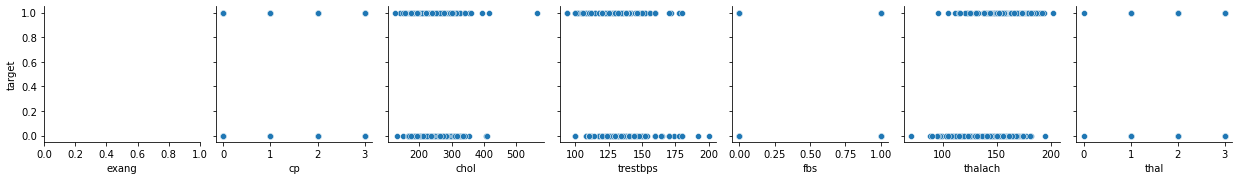

In [4]:
import seaborn as sns
sns.pairplot(data=heart_df[['target','exang','cp','chol','trestbps','fbs','thalach', 'thal']],
             x_vars=['exang','cp','chol','trestbps','fbs','thalach', 'thal'],
             y_vars=['target'])

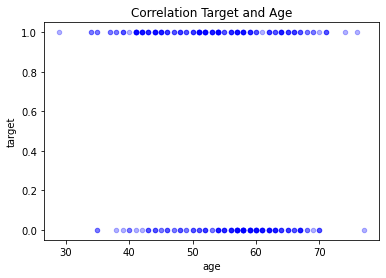

In [5]:
import matplotlib.pyplot as plt
# target is measured between integers 0 and 1 where 0 is heart disease and 1 is no heart disease
heart_df.plot(kind='scatter',
            x = 'age', y='target',
            color='blue',alpha=0.3,
            title='Correlation Target and Age')
plt.show()

Using a Gaussian Naive Bayes model to classify whether or not someone has heart disease based on their underlying health conditions

In [7]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

x = heart_df[['cp','chol','trestbps','exang','thal','oldpeak', 'restecg']]
y = heart_df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=18)

#create Gaussian Naive Bayes model
classifier = GaussianNB() 
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
print(y_test)
print(y_pred)
accuracy = classifier.score(x_test, y_test)
print(accuracy)


199    0
192    0
246    0
257    0
268    0
      ..
131    1
48     1
52     1
134    1
232    0
Name: target, Length: 91, dtype: int64
[1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0
 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1
 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0]
0.8901098901098901


Visualizing the Classification Results using a Confusion Matrix

<AxesSubplot:>

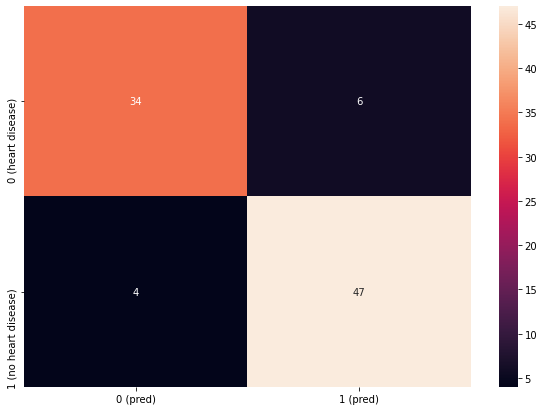

In [107]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

confusion_matrix = confusion_matrix(y_test,y_pred) #create confusion matrix
cm_df = pd.DataFrame(
    confusion_matrix, 
    index = [idx for idx in ['0 (heart disease)', '1 (no heart disease)']],
    columns = [col for col in ['0 (pred)', '1 (pred)']])
plt.figure(figsize = (10,7))
sns.heatmap(cm_df, annot=True)